In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline
from sklearn.model_selection import train_test_split


In [72]:
my_data_dir=r"C:\Users\deepthi devaraj\flag_data"

In [73]:
os.listdir(my_data_dir)

['10_country_test', '10_country_train_']

In [78]:
os.listdir(r"C:\Users\deepthi devaraj\flag_data\10_country_test")

['Argentina',
 'Australia',
 'Brazil',
 'China',
 'Germany',
 'Japan',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'Spain']

In [79]:
os.listdir(r"C:\Users\deepthi devaraj\flag_data\10_country_train_")

['Argentina',
 'Australia',
 'Brazil',
 'China',
 'Germany',
 'Japan',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'Spain']

In [1]:
from __future__ import print_function

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import load_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout

In [81]:
model = Sequential()


model.add(Conv2D(activation ='relu', input_shape = (64,64,3), filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=512, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=512, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=256, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(activation ='relu', filters=128, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(Conv2D(activation ='relu', filters=128, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))



model.add(Flatten())
model.add(Dense(units = 100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='softmax', kernel_initializer='uniform'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 512)       295424    
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 512)       2359808   
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 512)       0         
 ng2D)                                                

In [82]:
optimizer = Adam(learning_rate=0.001)

In [83]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [84]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [85]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
     

In [87]:

train_generator = train_datagen.flow_from_directory(
                                                    r"C:\Users\deepthi devaraj\flag_data\10_country_train_",
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                    r"C:\Users\deepthi devaraj\flag_data\10_country_test",
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 4283 images belonging to 10 classes.
Found 1049 images belonging to 10 classes.


In [88]:
train_generator.class_indices

{'Argentina': 0,
 'Australia': 1,
 'Brazil': 2,
 'China': 3,
 'Germany': 4,
 'Japan': 5,
 'Mexico': 6,
 'Russia': 7,
 'Saudi Arabia': 8,
 'Spain': 9}

In [89]:
train_generator.classes

array([0, 0, 0, ..., 9, 9, 9])

In [90]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [94]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=4283 / 30,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1,
    callbacks=[learning_rate_reduction]
)


C:\Users\deepthi devaraj\AppData\Local\Temp\ipykernel_28260\2027924930.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
143/142 [==============================] - ETA: 0s - loss: 2.1540 - accuracy: 0.1744WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


142/142 [==============================] - 535s 4s/step - loss: 2.1540 - accuracy: 0.1744 - val_loss: 1.5155 - val_accuracy: 0.4490 - lr: 0.0010
Epoch 2/50
143/142 [==============================] - ETA: 0s - loss: 1.3785 - accuracy: 0.4726WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 405s 3s/step - loss: 1.3785 - accuracy: 0.4726 - lr: 0.0010
Epoch 3/50
143/142 [==============================] - ETA: 0s - loss: 1.0706 - accuracy: 0.5830WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 458s 3s/step - loss: 1.0706 - accuracy: 0.5830 - lr: 0.0010
Epoch 4/50
143/142 [==============================] - ETA: -1s - loss: 0.9212 - accuracy: 0.6666WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 620s 4s/step - loss: 0.9212 - accuracy: 0.6666 - lr: 0.0010
Epoch 5/50
143/142 [==============================] - ETA: -1s - loss: 0.7871 - accuracy: 0.7060WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 756s 5s/step - loss: 0.7871 - accuracy: 0.7060 - lr: 0.0010
Epoch 6/50
143/142 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.7717WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 525s 4s/step - loss: 0.6795 - accuracy: 0.7717 - lr: 0.0010
Epoch 7/50
143/142 [==============================] - ETA: 0s - loss: 0.5601 - accuracy: 0.8328WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 479s 3s/step - loss: 0.5601 - accuracy: 0.8328 - lr: 0.0010
Epoch 8/50
143/142 [==============================] - ETA: 0s - loss: 0.5283 - accuracy: 0.8489WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 553s 4s/step - loss: 0.5283 - accuracy: 0.8489 - lr: 0.0010
Epoch 9/50
143/142 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.8753WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 558s 4s/step - loss: 0.4397 - accuracy: 0.8753 - lr: 0.0010
Epoch 10/50
143/142 [==============================] - ETA: 0s - loss: 0.4213 - accuracy: 0.8854WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 524s 4s/step - loss: 0.4213 - accuracy: 0.8854 - lr: 0.0010
Epoch 11/50
143/142 [==============================] - ETA: 0s - loss: 0.3680 - accuracy: 0.8921WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 523s 4s/step - loss: 0.3680 - accuracy: 0.8921 - lr: 0.0010
Epoch 12/50
143/142 [==============================] - ETA: 0s - loss: 0.3276 - accuracy: 0.9085WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 522s 4s/step - loss: 0.3276 - accuracy: 0.9085 - lr: 0.0010
Epoch 13/50
143/142 [==============================] - ETA: 0s - loss: 0.2724 - accuracy: 0.9251WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 498s 3s/step - loss: 0.2724 - accuracy: 0.9251 - lr: 0.0010
Epoch 14/50
143/142 [==============================] - ETA: 0s - loss: 0.2443 - accuracy: 0.9337WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 523s 4s/step - loss: 0.2443 - accuracy: 0.9337 - lr: 0.0010
Epoch 15/50
143/142 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.9337WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 514s 4s/step - loss: 0.2560 - accuracy: 0.9337 - lr: 0.0010
Epoch 16/50
143/142 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.9407WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 506s 4s/step - loss: 0.2006 - accuracy: 0.9407 - lr: 0.0010
Epoch 17/50
143/142 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.9318WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 497s 3s/step - loss: 0.2536 - accuracy: 0.9318 - lr: 0.0010
Epoch 18/50
143/142 [==============================] - ETA: 0s - loss: 0.2198 - accuracy: 0.9395WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 505s 4s/step - loss: 0.2198 - accuracy: 0.9395 - lr: 0.0010
Epoch 19/50
143/142 [==============================] - ETA: -29s - loss: 0.2041 - accuracy: 0.9458WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 17951s 126s/step - loss: 0.2041 - accuracy: 0.9458 - lr: 0.0010
Epoch 20/50
143/142 [==============================] - ETA: -7s - loss: 0.2066 - accuracy: 0.9468WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 4489s 32s/step - loss: 0.2066 - accuracy: 0.9468 - lr: 0.0010
Epoch 21/50
143/142 [==============================] - ETA: -1s - loss: 0.2047 - accuracy: 0.9407WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 766s 5s/step - loss: 0.2047 - accuracy: 0.9407 - lr: 0.0010
Epoch 22/50
143/142 [==============================] - ETA: -1s - loss: 0.1698 - accuracy: 0.9573WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 756s 5s/step - loss: 0.1698 - accuracy: 0.9573 - lr: 0.0010
Epoch 23/50
143/142 [==============================] - ETA: -1s - loss: 0.1500 - accuracy: 0.9594WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 753s 5s/step - loss: 0.1500 - accuracy: 0.9594 - lr: 0.0010
Epoch 24/50
143/142 [==============================] - ETA: -1s - loss: 0.1706 - accuracy: 0.9512WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 746s 5s/step - loss: 0.1706 - accuracy: 0.9512 - lr: 0.0010
Epoch 25/50
143/142 [==============================] - ETA: -1s - loss: 0.1537 - accuracy: 0.9556WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 750s 5s/step - loss: 0.1537 - accuracy: 0.9556 - lr: 0.0010
Epoch 26/50
143/142 [==============================] - ETA: -1s - loss: 0.2035 - accuracy: 0.9486WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 755s 5s/step - loss: 0.2035 - accuracy: 0.9486 - lr: 0.0010
Epoch 27/50
143/142 [==============================] - ETA: -1s - loss: 0.1910 - accuracy: 0.9528WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 737s 5s/step - loss: 0.1910 - accuracy: 0.9528 - lr: 0.0010
Epoch 28/50
143/142 [==============================] - ETA: 0s - loss: 0.1285 - accuracy: 0.9636WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 475s 3s/step - loss: 0.1285 - accuracy: 0.9636 - lr: 0.0010
Epoch 29/50
143/142 [==============================] - ETA: 0s - loss: 0.2164 - accuracy: 0.9433WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 480s 3s/step - loss: 0.2164 - accuracy: 0.9433 - lr: 0.0010
Epoch 30/50
143/142 [==============================] - ETA: 0s - loss: 0.1697 - accuracy: 0.9556WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 513s 4s/step - loss: 0.1697 - accuracy: 0.9556 - lr: 0.0010
Epoch 31/50
143/142 [==============================] - ETA: 0s - loss: 0.1510 - accuracy: 0.9626WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 509s 4s/step - loss: 0.1510 - accuracy: 0.9626 - lr: 0.0010
Epoch 32/50
143/142 [==============================] - ETA: 0s - loss: 0.1373 - accuracy: 0.9610WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 526s 4s/step - loss: 0.1373 - accuracy: 0.9610 - lr: 0.0010
Epoch 33/50
143/142 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9647WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 479s 3s/step - loss: 0.1178 - accuracy: 0.9647 - lr: 0.0010
Epoch 34/50
143/142 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9594WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 504s 4s/step - loss: 0.1554 - accuracy: 0.9594 - lr: 0.0010
Epoch 35/50
143/142 [==============================] - ETA: 0s - loss: 0.1560 - accuracy: 0.9575WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 490s 3s/step - loss: 0.1560 - accuracy: 0.9575 - lr: 0.0010
Epoch 36/50
143/142 [==============================] - ETA: 0s - loss: 0.1145 - accuracy: 0.9666WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 456s 3s/step - loss: 0.1145 - accuracy: 0.9666 - lr: 0.0010
Epoch 37/50
143/142 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9603WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 489s 3s/step - loss: 0.1554 - accuracy: 0.9603 - lr: 0.0010
Epoch 38/50
143/142 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.9703WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 461s 3s/step - loss: 0.1095 - accuracy: 0.9703 - lr: 0.0010
Epoch 39/50
143/142 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.9678WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 560s 4s/step - loss: 0.1095 - accuracy: 0.9678 - lr: 0.0010
Epoch 40/50
143/142 [==============================] - ETA: -1s - loss: 0.1119 - accuracy: 0.9710WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 744s 5s/step - loss: 0.1119 - accuracy: 0.9710 - lr: 0.0010
Epoch 41/50
143/142 [==============================] - ETA: -1s - loss: 0.1336 - accuracy: 0.9650WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 745s 5s/step - loss: 0.1336 - accuracy: 0.9650 - lr: 0.0010
Epoch 42/50
143/142 [==============================] - ETA: -1s - loss: 0.1384 - accuracy: 0.9605WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 747s 5s/step - loss: 0.1384 - accuracy: 0.9605 - lr: 0.0010
Epoch 43/50
143/142 [==============================] - ETA: -1s - loss: 0.1209 - accuracy: 0.9659WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 749s 5s/step - loss: 0.1209 - accuracy: 0.9659 - lr: 0.0010
Epoch 44/50
143/142 [==============================] - ETA: -1s - loss: 0.1193 - accuracy: 0.9696WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 727s 5s/step - loss: 0.1193 - accuracy: 0.9696 - lr: 0.0010
Epoch 45/50
143/142 [==============================] - ETA: -1s - loss: 0.1118 - accuracy: 0.9703WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 728s 5s/step - loss: 0.1118 - accuracy: 0.9703 - lr: 0.0010
Epoch 46/50
143/142 [==============================] - ETA: -1s - loss: 0.1060 - accuracy: 0.9715WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 862s 6s/step - loss: 0.1060 - accuracy: 0.9715 - lr: 0.0010
Epoch 47/50
143/142 [==============================] - ETA: 0s - loss: 0.0773 - accuracy: 0.9778WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 436s 3s/step - loss: 0.0773 - accuracy: 0.9778 - lr: 0.0010
Epoch 48/50
143/142 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9748WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 456s 3s/step - loss: 0.0910 - accuracy: 0.9748 - lr: 0.0010
Epoch 49/50
143/142 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9589WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 457s 3s/step - loss: 0.1462 - accuracy: 0.9589 - lr: 0.0010
Epoch 50/50
143/142 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.9755WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr


142/142 [==============================] - 460s 3s/step - loss: 0.1029 - accuracy: 0.9755 - lr: 0.0010


In [100]:
from tensorflow.keras.models import load_model
model.save('flag_detection.keras')

In [101]:
model.metrics_names

['loss', 'accuracy']

In [102]:
model.evaluate(validation_generator)

35/35 [==============================] - 23s 656ms/step - loss: 0.1217 - accuracy: 0.9714


[0.12165950238704681, 0.9714013338088989]

In [103]:
pred_probabilities=model.predict(validation_generator)

35/35 [==============================] - 24s 677ms/step


In [104]:
pred_probabilities

array([[5.60397282e-04, 9.19722152e-05, 8.22396250e-04, ...,
        4.72217827e-04, 9.54590261e-01, 2.48912165e-05],
       [2.98097249e-25, 1.00000000e+00, 7.01015240e-33, ...,
        6.65724640e-23, 1.34505030e-32, 2.73790619e-32],
       [0.00000000e+00, 1.04598256e-29, 4.39419166e-34, ...,
        2.82108862e-26, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 4.55169579e-36, 0.00000000e+00],
       [1.27029243e-09, 9.58810809e-09, 2.73016436e-11, ...,
        1.18747275e-05, 2.48527110e-17, 1.73364751e-04],
       [1.00000000e+00, 3.09137459e-16, 8.21981948e-15, ...,
        2.60167286e-21, 1.13219270e-24, 6.51316064e-23]], dtype=float32)

In [106]:
validation_generator.class_indices

{'Argentina': 0,
 'Australia': 1,
 'Brazil': 2,
 'China': 3,
 'Germany': 4,
 'Japan': 5,
 'Mexico': 6,
 'Russia': 7,
 'Saudi Arabia': 8,
 'Spain': 9}

In [107]:
validation_generator.classes

array([0, 0, 0, ..., 9, 9, 9])

In [109]:
predictions= pred_probabilities>0.5

In [110]:
predictions

array([[False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

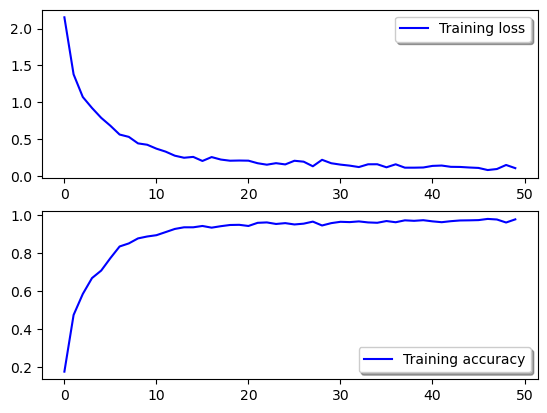

In [118]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [119]:
from sklearn.metrics import confusion_matrix

In [123]:
print(model.metrics_names)


['loss', 'accuracy']


In [116]:
from keras.preprocessing import image

test = image.load_img(r'C:\Users\deepthi devaraj\flag_data\10_country_test\Argentina\0 (3).jpeg',
                      target_size=(64, 64))
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)

print(model.predict(test))
print(train_generator.class_indices)

1/1 [==============================] - 0s 232ms/step
[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 3.258711e-11
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
{'Argentina': 0, 'Australia': 1, 'Brazil': 2, 'China': 3, 'Germany': 4, 'Japan': 5, 'Mexico': 6, 'Russia': 7, 'Saudi Arabia': 8, 'Spain': 9}
